# Mapping Countries by Number of Neighboring Countries

## TODO

* Fact check some numbers, i.e. China, Russia
* Check if overlaps is ever necessary

## Setup

Load the necessary modules and specify the files for input and output, set the number of colors to use, the size of the figure in inches (width, height) and meta information about what is displayed.

In [93]:
%load_ext signature
%matplotlib inline
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

from helpers import slug

pd.set_option('display.max_columns', 100)

shapefile = os.path.expanduser('~/data/geo/naturalearthdata.com/ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp')

cmap = 'viridis_r'
figsize = (20, 13)
title = 'Countries by number of neighboring countries'
imgfile = 'img/{}.png'.format(slug(title))
description = '''Author: Ramiro Gómez - ramiro.org'''.strip()

The signature extension is already loaded. To reload it, use:
  %reload_ext signature


Create a [GeoDataFrame](http://geopandas.org/data_structures.html#geodataframe) from the *Admin 0 - Countries* shapefile available from [Natural Earth Data](http://www.naturalearthdata.com/downloads/10m-cultural-vectors/) and show a sample of 5 records. We only read the ``ADM0_A3`` and ``geometry`` columns, which contain the 3-letter country codes defined in [ISO 3166-1 alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3) and the country shapes as polygons respectively.

In [200]:
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry', 'ISO_A2', 'NAME', 'TYPE']].to_crs('+proj=robin')
# Remove Antarctica
gdf = gdf[gdf['ADM0_A3'] != 'ATA']

In [106]:
gdf_all = gpd.read_file(shapefile).to_crs('+proj=robin')
gdf_all.head(1)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,None,Indo.,INDO,Republic of Indonesia,None,Indonesia,None,None,Indonesia,None,6,6,6,11,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,-99,ID,ID,IDN,IDN,360,360,ID,IDN,23424846,23424846,Exact WOE match as country,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((11108970.260 445285.130, 11108..."


In [32]:
# https://gis.stackexchange.com/questions/281652/find-all-neighbors-using-geopandas
neighbors = []
for index, row in gdf[:1].iterrows():
    print(type(row['geometry']))
    touches = gdf.geometry.touches(row['geometry'])
    overlaps = gdf.geometry.overlaps(row['geometry'])
    neighbors.append(len(gdf[touches].index | gdf[overlaps].index))

<class 'shapely.geometry.multipolygon.MultiPolygon'>


In [159]:
def neighbors(geometry):
    touches = gdf.geometry.touches(geometry)
    overlaps = gdf.geometry.overlaps(geometry)
    return (gdf[touches].index | gdf[overlaps].index)

In [178]:
import geonamescache

gc = geonamescache.GeonamesCache()
countries = gc.get_dataset_by_key(gc.get_countries(), 'iso3')

In [185]:
#len(sorted(countries['CN']['neighbours'].split(','))), len(sorted(countries['RU']['neighbours'].split(',')))
gdf['neighbor_count'] = gdf['ADM0_A3'].apply(lambda code: countries.get(code))
gdf.head()

,ADM0_A3,geometry,ISO_A2,NAME,TYPE,neighbor_count
0,IDN,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",ID,Indonesia,Sovereign country,"{'geonameid': 1643084, 'name': 'Indonesia', 'i..."
1,MYS,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",MY,Malaysia,Sovereign country,"{'geonameid': 1733045, 'name': 'Malaysia', 'is..."
2,CHL,"MULTIPOLYGON (((-6477059.899 -1872360.838, -64...",CL,Chile,Sovereign country,"{'geonameid': 3895114, 'name': 'Chile', 'iso':..."
3,BOL,"POLYGON ((-6477059.899 -1872360.838, -6477072....",BO,Bolivia,Sovereign country,"{'geonameid': 3923057, 'name': 'Bolivia', 'iso..."
4,PER,"MULTIPOLYGON (((-6477059.899 -1872360.838, -64...",PE,Peru,Sovereign country,"{'geonameid': 3932488, 'name': 'Peru', 'iso': ..."


In [199]:
#gdf[gdf['ADM0_A3'] == 'ESB'][:]
#pd.DataFrame(countries.keys())
countries['ATA']

{'geonameid': 6697173,
 'name': 'Antarctica',
 'iso': 'AQ',
 'iso3': 'ATA',
 'isonumeric': 10,
 'fips': 'AY',
 'continentcode': 'AN',
 'capital': '',
 'areakm2': 14000000,
 'population': 0,
 'tld': '.aq',
 'currencycode': '',
 'currencyname': '',
 'phone': '',
 'postalcoderegex': '',
 'languages': '',
 'neighbours': ''}

## Mapping the data

The merge operation above returned a GeoDataFrame. From this data structure it is very easy to create a choropleth map by invoking the ``plot`` method. We need to specify the ``column`` to plot and since we don't want a continuous color scale we set ``scheme`` to ``equal_interval`` and the number of classes ``k`` to ``9``. We also set the size of the figure and show a legend in the plot.

(-6200000.0, 8800000.0)

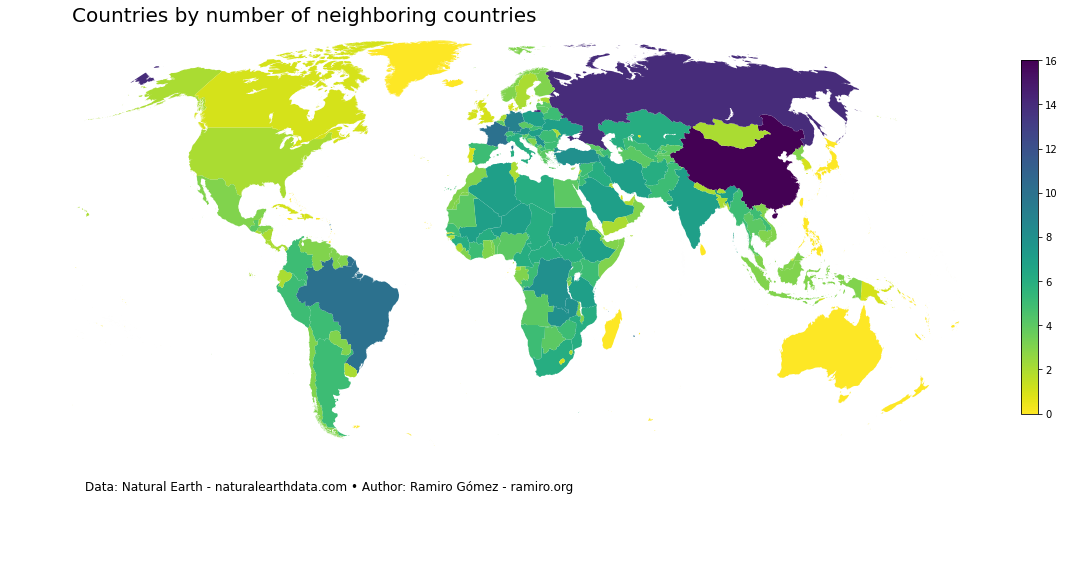

In [112]:
ax = gdf.plot(np.array(neighbors), cmap=cmap, figsize=figsize, legend=True, legend_kwds={'shrink': 0.5})
ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
ax.annotate(description, xy=(0.08, 0.15), size=12, xycoords='figure fraction')
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.set_ylim([-6.2e6, 8.8e6])

I think this map is fine for publication and the code is pretty easy to follow, but there is some room for improvement as far as I'm concerned. For example reducing the left and right margins, turning off axis display and specifying a color and/or pattern for missing data via parameters to the ``plot`` method would be nice to have. In any case, I think the GeoPandas project is headed in a good direction and hope it will continue to evolve as a library for analyzing and mapping geographic data in Python.

In [7]:
%signature